# <center> CS559: Homework #2 </center>
###  <center> Due:10/8/2021 Friday 11:59 PM</center>

- Change the file name as YourName_F21_CS559_HW2
- Submit the assignment in `ipynb` and `html` formats. 
    - You can export the notebook in HTML. 
    - Do not compress your files. Please submit files individually. 
- All work must be your own and must not be shared with other classmates. 
    - Collaboration with classmates or getting help by any people is not acceptable. 
    - For impletementation problems, do not copy algorithms from internet. 

### Problem 1 - Linear Regression [35 pts]

1-a. Consider a data set in which each data point $t_n$ is associated with a weighting factor $r_n>0$, so that the sum of squares error function becomes 

$${\large E_D(\vec{w})=\frac{1}{2}\sum_{n=1}^Nr_n\big(t_n-\vec{w}^T\vec{x}_n\big)^2}$$

Find an expression for the solution $w^*$ that minimizes this error function. [5 pts]

### Solution:

We have:
$${E_D(\vec{w})=\frac{1}{2}\sum_{n=1}^Nr_n\big(t_n-\vec{w}^T\vec{x}_n\big)^2\;\;\;\;\;\;\;-\;(i)}$$ 

Convert the equation in form of matrix products for ease of computation,therefore:

$${E_D(W)=\frac{1}{2}r_n\big(XW-t\big)^TR\big(XW-t\big)\;\;\;\;\;\;\;-\;(ii)}$$
${where,}$
$${X\;is\;a\;Matrix\;of\;size\;X_{m\times(N+1)}\;with\;m\;obsevations\;and\;N\;features\;i.e\;(N+1)\;parameters\\
    W\;is\;a\;Matrix\;of\;size\;W_{(N+1)\times1}=[w_0,w_1\;\;...w_N]\\
     t\;is\;target\;Matrix\;of\;size\; t_{m\times1}\\
    R\;is\;a\;diagonal\;matrix\;of\;size\;R_{m\times m} = diag(r_1,r_2\;\;...r_N)}$$
    $${}$$
    $${}$$
    ${By \;simplifying \;(ii)\; we\; get\;:}$
    $${}$$
    ${\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;E_D(W)=\frac{1}{2}\big(W^TX^T-t^T\big)\big(RXW-Rt\big)\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;[beacause\;(AB)^T=B^TA^T]}$
    $${}$$
    ${\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=\frac{1}{2}\big(W^TX^TRXW-W^TX^TRt-t^TRXW+t^TRT\big)}$
    $${}$$
    ${since\; all\; products\; in\; the \;above\; equation \;give\;a\; scalar_{1\times1},\;and\; S^T = S \;where\; S\; is \;scalar\; or \;diagonal}$
    $${}$$
    ${\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(W^TX^TRt)^T=t^TR^TXW}$
    $${}$$
    ${\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=t^TRXW\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;[because\;R^T=R]}$
    $${}$$
    ${therefore,}$
    $${}$$
    ${\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;E_D(W)=\frac{1}{2}\big(W^TX^TRXW-2W^TX^TRt+t^TRT\big)}$
    $${}$$
    ${for \;minimising\;E_D(\vec{w}),we \;take\; it's\; gradient\; and \;equate\; it\; to\; 0,\;therefore,}$
    $${}$$
    ${\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\frac{\partial{E_D(W)}}{\partial W}=X^TRXW-X^TRt=0}$
    $${}$$
    ${\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;W = (X^TRX)^{-1}X^TRt}$
    $${}$$
    ${therefore,\;our \;minimized\;solution\;is}$
    $${w^* = (X^TRX)^{-1}X^TRt}$$
    $${}$$$${}$$


1-b. Implement a function called, `my_error(data,r_n)`, that estimates the error using the error function, $E_D(\vec{w})$, from 1-a. The task to implement a function to estimates the optimized $vec{w}$ and demonstrates the behavior of error at different weighting factor, $r_n$, values. The function return a list of $\vec{w}$, $r_n$, and error. Do not use any other modules except `numpy`. [10 pts]

In [290]:
import numpy as np
from numpy.random import RandomState 
import pandas as pd
#the below function inv() inverts a square singular matrix, we define this because numpy.inv() throws an error when inverting singular matrices
#this function uses least squares to compute the inverse
def inv(square_matrix):
    a = square_matrix.shape[0]
    diag = np.eye(a, a)
    return np.linalg.lstsq(square_matrix,diag,rcond=None)[0]

### my_error starts here
def my_error(data,r_n):
    features = data.iloc[:, :(len(data.columns) - 1)].to_numpy() 
    n = len(data) #number of observations
    t = data.iloc[: , -1].to_numpy() #target variable (nX1) matrix
    X = np.column_stack((np.ones(n),features)) #explanatory variable matrix (m+1)Xn matrix, where m is number of features,the extra column is for x0 = 1
    XT = X.transpose() #transpose of X, nX(m+1) matrix
    R = np.diag(r_n)  #diagonal weighting factor matrix for r_n values, size nXn
    XT_R = np.dot(XT,R) #product of XT and R, XT.R
    XT_R_X = np.dot(XT_R,X)#product of XT.R and X, XT.R.X
    XT_R_X_INV = inv(XT_R_X) #inverse of XT.R.X
    XT_R_t = np.dot(XT_R,t) #product of XT.R and t, XT.R.t
    
    #equating the gradient of sum of error function to '0' in question 1(a), we derived the optimised value for w in matrix form as (XT.R.X)^-1.(XT.R.t)
    w = np.dot(XT_R_X_INV,XT_R_t) #(XT.R.X)^-1.(XT.R.t)
    
    XW = np.dot(X,w) #product of X and w, X.w
    nres = XW - t     #negative residual XW - t
    nresT = nres.transpose() #transpose of nres
    nresT_R = np.dot(nresT,R) #product of (XW-t) and R, (XW-t.R)
    
    
    #similarly we also converted the error function in matrix form in 1(a) as:
    error = 0.5*(np.dot(nresT_R,nres))

    return w, error, r_n




####testing funtion my_error() not relevant and can be ignored
#let's test this function on a linear model y = w_0 + w_1.x_1

f = lambda x: 1.*x + 1.

#generate X positions of data
X = np.linspace(0.,20.,21)
#generate Y positions of data, follow function f with random error
ran = RandomState()
Y = f(X) + ran.randn(len(X))
#create dataset with columns X and Y
data = pd.DataFrame(np.column_stack((X,Y)))
r_n = np.ones(len(data)) #initiaize r_n
r_n2 = [2]*len(data)     #trying diff r_n
r_n3 = [3]*len(data)     #trying diff r_n
e = my_error(data,r_n)
print('optimized W for f(X):',e[0])
print('Error:',e[1])
print('R',e[2])
print('------------------')

e2 = my_error(data,r_n2)
e3 = my_error(data,r_n3)
print('error value for r_n=2',e2[1])
print('error value for r_n=3',e3[1])
print('------------------')
#we can see that error is directly proportional to r_n when r_n is same for each point.
#we can also try different values of r_n for each point
r_n = np.linspace(0.1,2,len(data))
r_n2 = np.linspace(3,5,len(data))

e2 = my_error(data,r_n[::-1])
e3 = my_error(data,r_n2[::-1])
print('error value for r_n series 0.1 to 2',e2[1])
print('error value for r_n series 3 to 5',e3[1])
print('------------------')
#we get the same result, if r_n value increases, error value increases


optimized W for f(X): [1.42537942 0.96448621]
Error: 8.08156429089746
R [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
------------------
error value for r_n=2 16.16312858179492
error value for r_n=3 24.24469287269238
------------------
error value for r_n series 0.1 to 2 10.356931395659151
error value for r_n series 3 to 5 34.39213116096811
------------------


1-c. Load the dataset, make a model using Linear Regression from sklearn.linear_model to predict the target `y` from a given dataset `HW2_LR.csv`. Students must do EDA and pre-processing the dataset before training the model. All pre-processing and EDA work must be explained and the weights and mean squared error value must be reported. Treat the whole dataset as a train set. [15 pts]

In [291]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix


In [292]:
data = pd.read_csv('./HW2_LR.csv')
### EDA stars here
# data.info()
# # no null values
data.describe()
#ranges differ a lot, need to scale data appropriately

,a,b,c,d,k,y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,150.445884,98.084535,5394.432218,-0.779184,0.788158,-3.716766e+05
std,86.830028,346.622332,2652.750144,0.617875,0.627936,1.842971e+06
min,1.010000,-499.850000,800.690000,-3.863405,-0.489047,-6.532252e+06
25%,74.447500,-204.830000,3119.750000,-1.142718,0.313955,-1.404627e+06
50%,151.250000,98.705000,5394.045000,-0.685267,0.678321,-7.736748e+04
75%,225.652500,399.640000,7714.985000,-0.306234,1.168409,8.068422e+05
max,299.960000,699.940000,9999.390000,0.648288,3.618800,3.523715e+06


In [293]:
from scipy import stats

# data.hist(bins=50, figsize=(20,15))


corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')
#here we can see that the explanatory varibales have a very weak correlation with each other, that is good as this means there is no multicolinearity between features
#but we can also see that only 'b' has a strong correlation with tartget 'y', 
#the rest of the varaibles have a significantly weak correlation,with 'c' being slightly less weak
#we can think of dropping a,d and k but we dont know if it would improve the model with certainity, so we keep them, considering we have less feautures anyway.
#the most promising feature to predict target is 'b'

,a,b,c,d,k,y
a,1.000000,-0.000653,-0.006025,0.004453,-0.015583,-0.001269
b,-0.000653,1.000000,0.008605,0.000939,-0.010636,0.757798
c,-0.006025,0.008605,1.000000,-0.002058,-0.010417,0.143611
d,0.004453,0.000939,-0.002058,1.000000,-0.009728,-0.009892
k,-0.015583,-0.010636,-0.010417,-0.009728,1.000000,-0.008144
y,-0.001269,0.757798,0.143611,-0.009892,-0.008144,1.000000


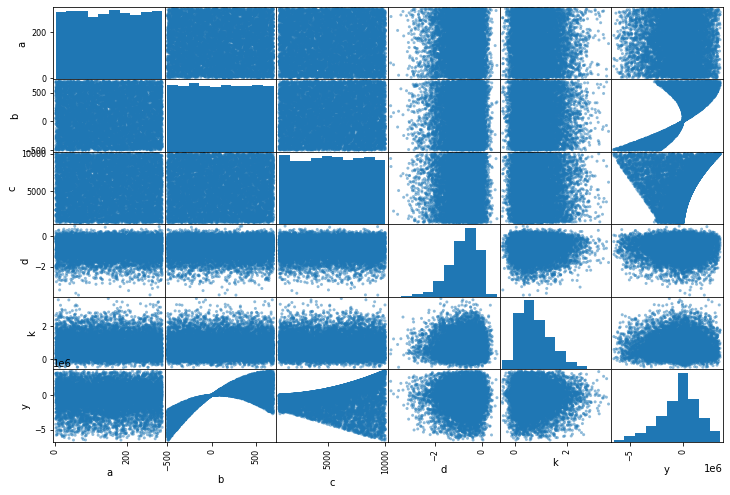

In [294]:
scatter_matrix(data, figsize=(12,8))
plt.show()
#the data is not normally distributed as we can see

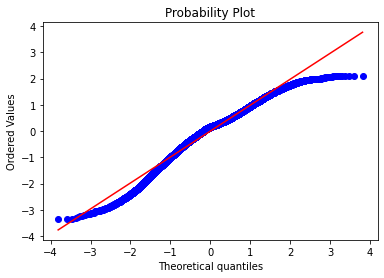

In [295]:
#we can see above that the data is not scaled properly,let's scale it
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
new_data = pd.DataFrame(scaled_data,columns = ['a','b','c','d','k','y'])
new_data.describe()
stats.probplot(new_data['y'],plot=plt)
plt.show()

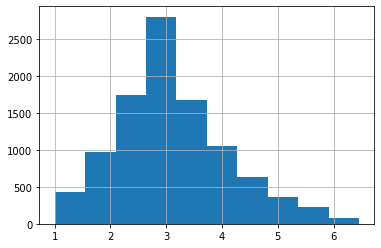

negative values= 0


In [296]:
#above we see from the scatter and probability plots that the target data is slightly negtively skewed
#we can fix this by reflecting y to a positive skew and transforming using sqrt as the skewness is moderate
max = np.max(new_data['y'])
new_data['refy'] = max +1
new_data['refy'] = new_data['refy'] - new_data['y']
new_data['refy'].hist()
plt.show()
positive_values = [1 if i>=0 else 0 for i in new_data['refy']]
negative_values = len(new_data)-np.sum(positive_values)
print('negative values=',negative_values)

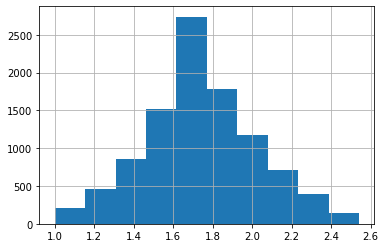

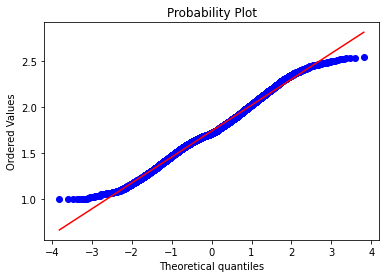

In [297]:
#sqrt transformation on positively skewed data as there are no negative values

new_data['refy'] = np.sqrt(new_data['refy'])
new_data['refy'].hist()
plt.show()

stats.probplot(new_data['refy'],plot=plt)
plt.show()
#now target is roughly normal

In [298]:
new_data = new_data.drop(columns = ['y'])
new_data

,a,b,c,d,k,refy
0,-0.921915,1.481904,-1.023556,1.072524,-0.604221,1.855825
1,1.697011,0.215881,1.354235,0.178496,0.188918,1.477439
2,0.731167,0.938058,-1.466073,0.332634,0.118794,1.801920
3,-1.280680,0.736503,1.107505,1.027247,-0.091079,1.337428
4,-1.664207,-0.785201,-0.823339,1.006479,-1.534151,1.824941
...,...,...,...,...,...,...
9995,-0.666921,-1.581237,1.383874,0.192475,-0.963105,2.427920
9996,-0.200124,-0.677586,-1.230163,-0.179129,-0.413745,1.772434
9997,-0.990904,1.252335,0.848335,-1.817312,1.732533,1.334337
9998,-0.750767,1.267135,0.130836,0.514752,0.903022,1.527984


In [299]:
### Linear Regression Modeling starts here
# from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split(new_data, test_size=0.1, random_state=42)

LR = LinearRegression()
features = new_data.drop(columns = ['refy'])
target = new_data[['refy']]
LR.fit(features,target)

#prediction is done by a test set ideally but we used up the entire set in training as asked in the question.
#therfore we use the same dataset for prediction as well
y_pred = LR.predict(train_set)
# y_pred = LR.predict(test_set)
model_error = LR.score(features,target)
mse = mean_squared_error(target,y_pred)
print('MSE :',mse)
print('Regression Coefficients :',LR.coef_)

#note: we get a very small value for MSE as we have not split the data, so the model is overfitted towards the train set

MSE : 0.030931581678760416
Regression Coefficients : [[ 9.12833215e-05 -2.12948421e-01 -5.72370133e-02  3.16450655e-03
   6.17847116e-05]]


1-d. Use the function `my_error()` from 1-b to estimate $\vec{w}$ and make a visualization to show the behavior of error in terms of $r_n$. Add a point to indicate the final training model error obtained from 1-c. [5 pts]

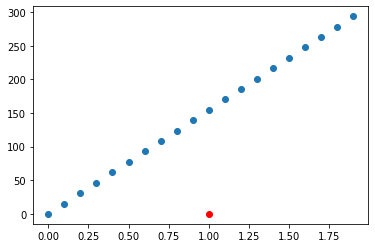

In [300]:
### Visualization starts from here. 
#for now lets assume that r_n is a constant and has same value for each data point, so that we can track r_n vs error more easily

def r_n_vs_error(data):
    num_of_tests = 20
    rn_values = []
    errorvalues = []
    for i in range(num_of_tests):
        r_n = [i/10]*len(data)
        e = my_error(data,r_n)
        errorvalues.append(e[1])
        rn_values.append(r_n[0])
    return errorvalues,rn_values

er,rn = r_n_vs_error(new_data)

#visualization of r_n vs error
plt.scatter(rn, er)
plt.plot(1,model_error,'ro')
plt.show()

#we can see that r_n and error have a strong positive linear correlation, i.e as r_n increases error also increases linearrly
#this plot verifies the equation E(W) = 1/2*SUM{rn(tn-WT.xn)}
#red point is MSE from 1(c)

### Problem 2 - Linear Classification 1 [65 pts]

In this assignment, you are going to implement three classifiers - **LDA, Perceptron, and Logistic Regression** - to predict the risk of heart attack using the provided dataset, `heart.csv`. 

Here are data attributes:
- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- output : 0= less chance of heart attack 1= more chance of heart attack

In [301]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

2-a. Implement `my_LDA` that classifies the target. Use `accuracy_score` from `sklearn.metrics` to calculate the accuracy. [10 pts]

In [302]:
### my_LDA starts here
#the target class is binary, therefore implementing fisher Discriminant algorithm
def my_LDA(X_train,X_test):
    #Fisher Discriminant Algorithm for binary classes
    #separate the data by class
    grouped = X_train.groupby(['output'])
    class1_data = grouped.get_group(0)
    class2_data = grouped.get_group(1)
    class1_data=class1_data.drop(['output'],axis=1)
    class2_data=class2_data.drop(['output'],axis=1)
    #calculate the means for each class
    mean1 = class1_data.mean(axis = 0)
    mean2 = class2_data.mean(axis = 0)
    #vectorize the means
    mean1, mean2 = mean1.T, mean2.T
    #calculate (x - m_1) for scatter calc
    m,n = class1_data.shape
    diff1 = class1_data - np.array(list(mean1)*m).reshape(m,n)
    #calculate (x - m_2) for scatter calc
    m,n = class2_data.shape
    diff2 = class2_data - np.array(list(mean2)*m).reshape(m,n)
    #creating a matrix to diff1 and diff2
    diff = np.concatenate([diff1, diff2])
    m, n = diff.shape
    withinClass = np.zeros((n,n))
    diff = np.matrix(diff)
    #S_1 = s1^2 = Summation(x - m_1)(x - m_1)^T
    #S_2 = s1^2 = Summation(x - m_2)(x - m_2)^T
    #S_w = S_1 + S_2 = s1^2 + s2^2
    for i in range(m):
        #calculate within class scatter matrix S_W using the above formula for fisher discriminant
        withinClass += np.dot(diff[i,:].T, diff[i,:])
    #find optimum direction vector for separation argmax(W) ~  S_W^(-1).(m_1-m_2)
    opt_dir_vector = np.dot(inv(withinClass), (mean1 - mean2))
    
    #calculate threshold value for classification  C = 1/2(mu1+mu2)
    mu1=np.dot(opt_dir_vector,class1_data.T).mean(axis = 0)
    mu2=np.dot(opt_dir_vector,class2_data.T).mean(axis = 0)
    threshold=(mu1+mu2)/2

    #fisher criterion for classification is that if W^T.X > threshold assign to Class1 else Class2
    target_pred=np.dot(X_test,np.matrix(opt_dir_vector).T)
    target_pred = np.where(target_pred > threshold, 0, 1)
    
    return target_pred

2-b. Implement `my_Perceptron` that classifies the target. Use `accuracy_score` from `sklearn.metrics` to calculate the accuracy. [10 pts]

In [303]:
import random
### my_Perceptron starts here
def my_Perceptron(features_train,target_train,features_test):
    target = target_train.to_numpy()              # vector having observed values of target
    n_features = np.shape(features_train)[1]      # number of features
    weights = [random.random()*0.1 for _ in range(n_features)] # vector having initial random weights for each feature
    theta = 0                                     # threshold of output function
    alpha = 0.01                                  # rate at which model learns, a small value is preferable
    total_iterations = 1000                   

    # perceptron algorithm
    for itr in range(total_iterations):
        for feature_index in range(n_features):
            f = np.dot(features_train[feature_index], weights) - theta  # transfer function f(X): WT.X - threshold
            target_pred = np.where(f >= 0, 1, 0)        # predict class 1 if transfer function >=0,else predict class 0
            
            # update rule of perceptron, update_weights = 0,if correct value is predicted, else update_weights by 0.01 i.e learning rate
            update_weights = alpha * (target[feature_index] - target_pred)
            # update weights of perceptron and threshold value, goal is to run all iterations and fix final weights and threshold
            weights += update_weights * features_train[feature_index]
            theta -= update_weights
    #model training finished
    
    #prediction
    f = np.dot(features_test, weights) - theta
    target_pred = np.where(f >= 0, 1, 0)
    
    return target_pred



2-c. Implement `my_LogisticRegression` that classifies the target. Use `accuracy_score` from `sklearn.metrics` to calculate the accuracy. [10 pts]

In [304]:
### my_LogisticRegression starts here
#the target class is binary, therefore implementing as such
def my_LogisticRegression(features_train,target_train,features_test):
                         
    n_samples,n_features = features_train.shape # number of observations,features
    weights = np.zeros(n_features)              # vector having weights for each feature
    beta = 0                                    # zero^th parameter/intercept
    alpha = 0.01                                # rate at which model learns, a small value is preferable
    total_iterations = 1000
    # gradient descent algorithm
    for itr in range(total_iterations):
        # approximate target with linear combination of weights and feature set, add a bias b. f(X)=X.W + b
        f = np.dot(features_train, weights) + beta
        # predict target values by using logistic sigmoid function f(a)=1/(1+e^-a) where a = X.W + b
        target_pred = 1 / (1 + np.exp(-f))

        # formulate gradients for weights 1/n*summation[XT(y-t)] and b 1/n*summation[(y-t)]
        dw = (1 / n_samples) * np.dot(np.transpose(features_train), (target_pred - target_train))
        db = (1 / n_samples) * np.sum(target_pred - target_train)
        # update weights and b
        weights -= alpha * dw
        beta -= alpha * db
    #model training finished
    
    #prediction
    f = np.dot(features_test, weights) + beta
    target_pred = 1 / (1 + np.exp(-f))
    target_pred_binary = [1 if i > 0.5 else 0 for i in target_pred]
    return np.array(target_pred_binary)


2-d. The EDA and pre-processing are not limitted however, you must
1. check if the data is **balanced** or not. 
2. check if features are **skewed** or not.
3. check outliers. 

For any finds from 1 to 3, please handle the data carefully. Exaplin your workflow and perform accordingly. If any interesting facts are learned, please state them. [15 pts]

In [305]:
### EDA stars here
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

dataset = pd.read_csv('heart.csv')
print(dataset.duplicated().sum())
#one duplicate row, need to drop it
print(dataset.isnull().sum())
#no null/missing values

1
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [306]:
dataset.drop_duplicates(inplace=True)
# dataset.info()
dataset.describe()
#we can see that the ranges are diverse we can scale them after encoding categorical columns
#The average blood pressure of an individual is 131.6 whereas the maximun value caps at 200.
#The average heart rate of the group is 149.5, whereas overall it ranges between 133 to 202
#Age of the group varies from 29 to 77 and the mean age is 54.4

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


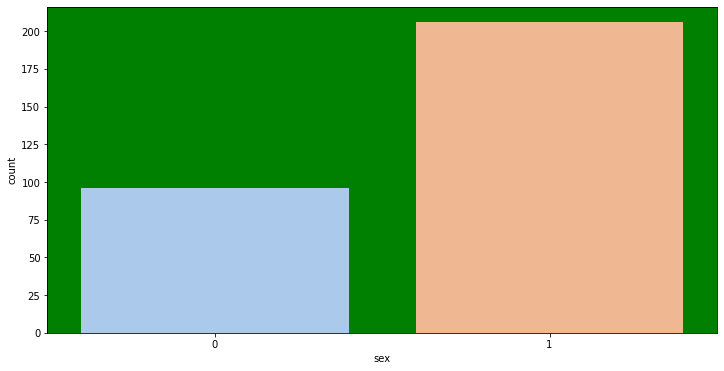

In [307]:
plt.figure(figsize=(12,6))
ax=plt.axes()
ax.set_facecolor("green")
p = sns.countplot(data=dataset, x="sex", palette='pastel')
plt.show()
#the data set has a lot of bias towards one class of sex as there are more than double observations for class 1

In [308]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')
#we can see that there is low multi colinearity between most of the variables except slope and thalachh
#thalach and cp would be the most important factors for classification as they have high corr with target

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


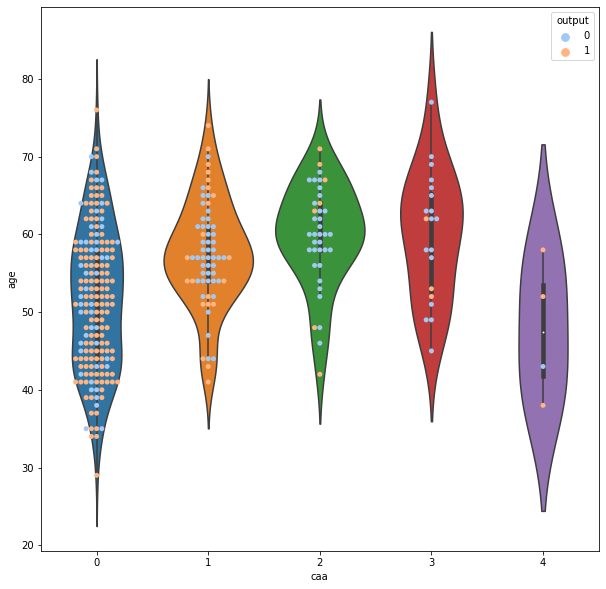

In [309]:
plt.figure(figsize = (10,10))
sns.violinplot(x='caa',y='age',data=dataset)
sns.swarmplot(x=dataset['caa'],y=dataset['age'],hue=dataset['output'], palette='pastel')
plt.show()
# This swarmplot gives us a lot of information.
# Accoring to the figure, people belonging to caa category '0' , irrespective of their age are highly prone to getting a heart attack.
# While there are very few people belonging to caa category '4' , but it seems that around 75% of those get heart attacks.
# People belonging to category '1' , '2' and '3' are more or less at similar risk.

In [310]:
category_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
numerical_columns = ['age','trtbps','chol','thalachh','oldpeak']

In [311]:
### Pre-processing starts here


#get encoded valuse for all categorical columns
cp = pd.get_dummies(dataset['cp'],prefix='cp')
thal = pd.get_dummies(dataset['thall'],prefix='thall')
slope = pd.get_dummies(dataset['slp'],prefix='slp')
sex = pd.get_dummies(dataset['sex'],prefix='sex')
fbs = pd.get_dummies(dataset['fbs'],prefix='fbs')
restecg = pd.get_dummies(dataset['restecg'],prefix='restecg')
exng = pd.get_dummies(dataset['exng'],prefix='exng')
caa = pd.get_dummies(dataset['caa'],prefix='caa')
#add the encoded columns to the dataset
lst = [dataset,cp,thal,slope,sex,fbs,restecg,exng,caa]
dataset = pd.concat(lst,axis=1)
dataset.head()
dataset.drop(columns=['cp','thall','slp','sex','fbs','restecg','exng','caa'],axis=1,inplace=True)
######################
X_features = dataset.drop(['output'],axis=1)
y_target = dataset['output']
#scale columns using standard scaler
scalerX = StandardScaler()
X_features = scalerX.fit_transform(X_features)
#split dataset into test and train with a 20:80 ratio
X_train , X_test , y_train , y_test = train_test_split(X_features,y_target,test_size=0.2,random_state=42)

2-e. Use ML LDA, Perceptron, and LogisticRegression from sklearn to classify the trained data and report the accuracy. [10 pts]

In [312]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron

In [313]:
### LDA starts here
clf1= LinearDiscriminantAnalysis()
clf1.fit(X_train,y_train)
y_pred = clf1.predict(X_test)

clf1_accuracy = accuracy_score(y_test,y_pred)

In [314]:
### Perceptron starts here
clf2 = Perceptron()
clf2.fit(X_train,y_train)
y_pred = clf2.predict(X_test)
clf2_accuracy = accuracy_score(y_test,y_pred)

In [315]:
### Logistic Regression starts here
clf3 = LogisticRegression()
clf3.fit(X_train,y_train)
y_pred = clf3.predict(X_test)
clf3_accuracy = accuracy_score(y_test,y_pred)

2-f. Use the implemented classifiers from 2-a to 2-c and classify the output. [10 pts] 

In [316]:
clf4= my_LDA(dataset,X_test)

clf4_accuracy = accuracy_score(y_test,clf4)

In [317]:
clf5= my_Perceptron(X_train,y_train,X_test)

clf5_accuracy = accuracy_score(y_test,clf5)


In [318]:
clf6= my_LogisticRegression(X_train,y_train,X_test)

clf6_accuracy = accuracy_score(y_test,clf6)


In [319]:
# result_table = pd.DataFrame({'Model',['clf1','clf2','clf3','clf4','clf5','clf6'],
#                              'Accuracy':[clf1_accuracy,clf2_accuracy,clf3_accuracy,
#                                         clf4_accuracy,clf5_accuracy,clf6_accuracy]})
# result_table

result_table = pd.DataFrame([['clf1',clf1_accuracy],['clf2',clf2_accuracy],['clf3',clf3_accuracy],['clf4',clf4_accuracy]
                            ,['clf5',clf5_accuracy],['clf6',clf6_accuracy]]
                            ,columns = ['Model','Accuracy'])
result_table

,Model,Accuracy
0,clf1,0.868852
1,clf2,0.770492
2,clf3,0.885246
3,clf4,0.901639
4,clf5,0.754098
5,clf6,0.901639
